# Scatter plot of lap times

This is from https://docs.fastf1.dev/gen_modules/examples_gallery/plot_driver_laptimes.html

In [2]:
import seaborn as sns
from matplotlib import pyplot as plt

import fastf1
import fastf1.plotting

# Enable Matplotlib patches for plotting timedelta values and load
# FastF1's dark color scheme
fastf1.plotting.setup_mpl(mpl_timedelta_support=True, misc_mpl_mods=False,
                          color_scheme='fastf1')

In [3]:
race = fastf1.get_session(2023, "Azerbaijan", 'R')
race.load()

req         WARNING 	DEFAULT CACHE ENABLED! (774.83 MB) /Users/mjbernha/Library/Caches/fastf1
core           INFO 	Loading data for Azerbaijan Grand Prix - Race [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching tra

We filter the race data down to only Alonso, and use `pick_quicklaps()` to filter out data that isn't ultimately
of interest and will distort the visualization.

In [4]:
driver_laps = race.laps.pick_drivers("ALO").pick_quicklaps().reset_index()

The following block will create a minimal scatterplot, but it leaves much to be desired in its organization and
aesthetics.

<Axes: xlabel='LapNumber', ylabel='LapTime'>

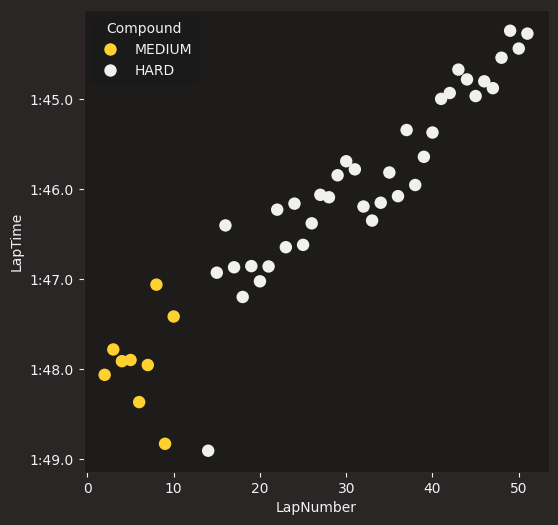

In [14]:
fig, ax = plt.subplots(figsize=(6, 6))

sns.scatterplot(data=driver_laps,
                x="LapNumber",
                y="LapTime",
                ax=ax,
                hue="Compound",
                palette=fastf1.plotting.get_compound_mapping(session=race),
                s=80,
                linewidth=0,
                legend='auto')


Here is the full plot construction, with the added graphic and layout tweaks.

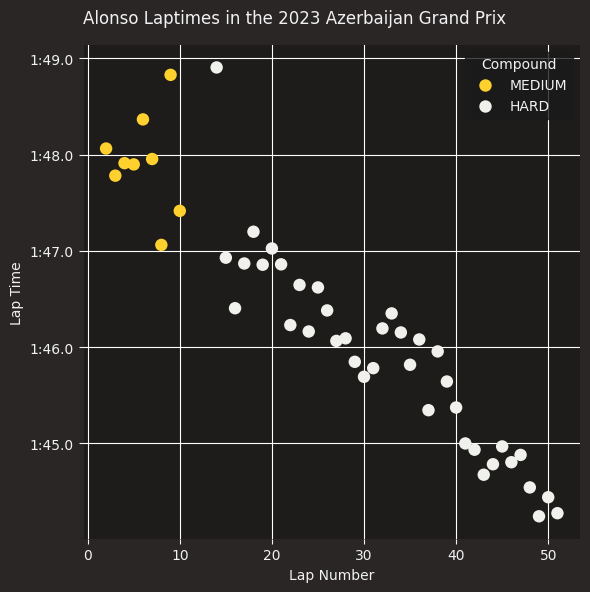

In [13]:
fig, ax = plt.subplots(figsize=(6, 6))

sns.scatterplot(data=driver_laps,
                x="LapNumber",
                y="LapTime",
                ax=ax,
                hue="Compound",
                palette=fastf1.plotting.get_compound_mapping(session=race),
                s=80,
                linewidth=0,
                legend='auto')

# Just ending the cell with the lines above results in a minimal scatterplot, but it can be made better.

ax.set_xlabel("Lap Number")
ax.set_ylabel("Lap Time")

# The y-axis increases from bottom to top by default
# Since we are plotting time, it makes sense to invert the axis
ax.invert_yaxis()
plt.suptitle("Alonso Laptimes in the 2023 Azerbaijan Grand Prix")

# Turn on major grid lines
plt.grid(color='w', which='major', axis='both')
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()


---

This is the end of the notebook.